# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(mouse_metadata, study_results, how = 'left', on = "Mouse ID")

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(data_complete["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data_complete.groupby(["Mouse ID", "Timepoint"])["Mouse ID"].transform('size') > 1
duplicate_ID = data_complete[duplicate]
duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
removed_dups = data_complete[data_complete["Mouse ID"] != 'g989']

In [5]:
# Checking the number of mice in the clean DataFrame.
len(removed_dups["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_data = removed_dups.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = drug_data["Tumor Volume (mm3)"].mean()
tumor_median = drug_data["Tumor Volume (mm3)"].median()
tumor_variance = drug_data["Tumor Volume (mm3)"].var()
tumor_deviation = drug_data["Tumor Volume (mm3)"].std()
tumor_sem = drug_data["Tumor Volume (mm3)"].sem()

tumor_mean = tumor_mean.rename("Mean of Tumor Volume")
tumor_median = tumor_median.rename("Median of Tumor Volume")
tumor_variance = tumor_variance.rename("Variance of Tumor Volume")
tumor_deviation = tumor_deviation.rename("Standard Deviation of Tumor Volume")
tumor_sem = tumor_sem.rename("SEM of Tumor Volume")

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.merge(tumor_mean, tumor_median, left_index=True, right_index=True)
tumor_summary = pd.merge(tumor_summary, tumor_variance, left_index=True, right_index=True)
tumor_summary = pd.merge(tumor_summary, tumor_deviation, left_index=True, right_index=True)
tumor_summary = pd.merge(tumor_summary, tumor_sem, left_index=True, right_index=True)

tumor_summary

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumorVol_summary = drug_data["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
tumorVol_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

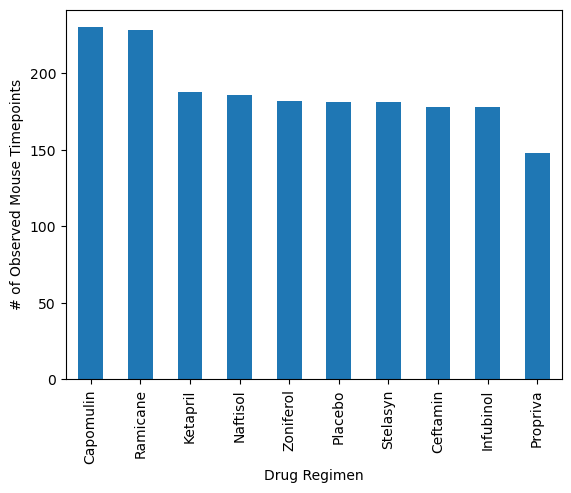

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_of_mice = drug_data["Mouse ID"].count()
count_of_mice.sort_values(ascending=False, inplace=True)

plot_mice = count_of_mice.plot(kind="bar", ylabel = "# of Observed Mouse Timepoints")

plot_mice

Text(0, 0.5, '# of Observed Mouse Timepoints')

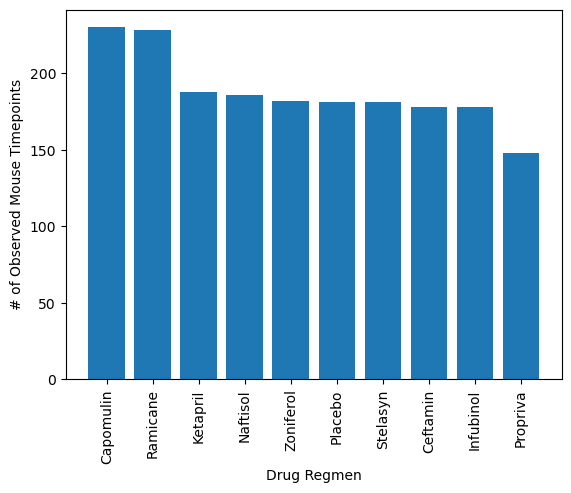

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
name_of_drug = count_of_mice.keys()

plt.bar(name_of_drug, count_of_mice)
plt.xticks(name_of_drug, rotation = 90)
plt.xlabel("Drug Regmen")
plt.ylabel("# of Observed Mouse Timepoints")

<Axes: title={'center': 'Distribution of Gender'}>

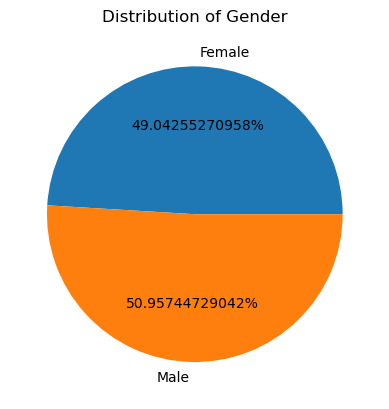

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_of_mouse = removed_dups.groupby('Sex')
count_of_gender = gender_of_mouse['Mouse ID'].count()
pie_chart = count_of_gender.plot(kind= "pie", title = "Distribution of Gender", autopct = '%1.11f%%', ylabel= "")

pie_chart

Text(0.5, 1.0, 'Distribution of Gender')

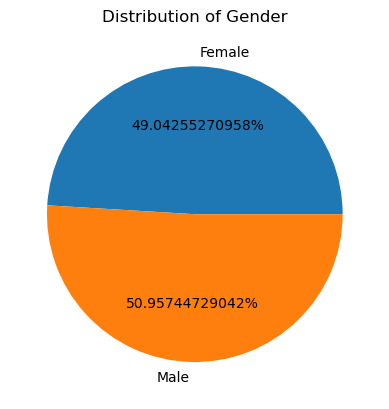

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = count_of_gender.keys()
plt.pie(count_of_gender, labels=gender, autopct="%1.11f%%")
plt.title("Distribution of Gender")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_data_short = removed_dups[(removed_dups['Drug Regimen'] == 'Capomulin')|(removed_dups['Drug Regimen'] == 'Ramicane')|(removed_dups['Drug Regimen'] == 'Infubinol')|(removed_dups['Drug Regimen'] == 'Ceftamin')]
# Start by getting the last (greatest) timepoint for each mouse
data_by_mouse = drug_data_short.groupby("Mouse ID")
max_timepoints = data_by_mouse['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_final = pd.merge(max_timepoints, drug_data_short, on=['Mouse ID', 'Timepoint'], how = 'inner')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_drugs = data_final['Drug Regimen'].unique().tolist()
# Create empty list to fill with tumor vol data (for plotting)

Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin = []


for index, row in data_final.iterrows():
    if row["Drug Regimen"] == list_of_drugs[0]:
        Capomulin.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == list_of_drugs[1]:
        Ramicane.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == list_of_drugs[2]:
        Infubinol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == list_of_drugs[3]:
        Ceftamin.append(row["Tumor Volume (mm3)"])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def find_outliers(list_of_drugs):
    lowerq = np.percentile(list_of_drugs, 25)
    upperq = np.percentile(list_of_drugs, 75)
    iqr = upperq - lowerq
    upperbound = upperq + (1.5*iqr)
    lowerbound = lowerq - (1.5*iqr)

    outliers =[]

    for x in list_of_drugs:
        if(x > upperbound) | (x < lowerbound):
            outliers.append(x)

    return print(outliers)
    # Determine outliers using upper and lower bounds

find_outliers(Capomulin)
find_outliers(Ramicane)
find_outliers(Infubinol)
find_outliers(Ceftamin)

[36.3213458]
[]
[]
[]


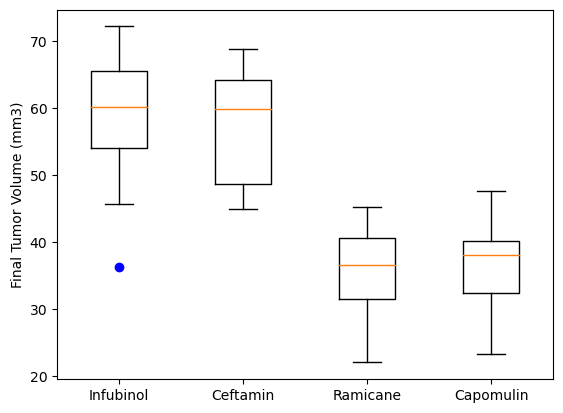

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_data = [Capomulin, Ramicane, Infubinol, Ceftamin]
plt.boxplot(tumor_data, 0, "bo", labels = list_of_drugs)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

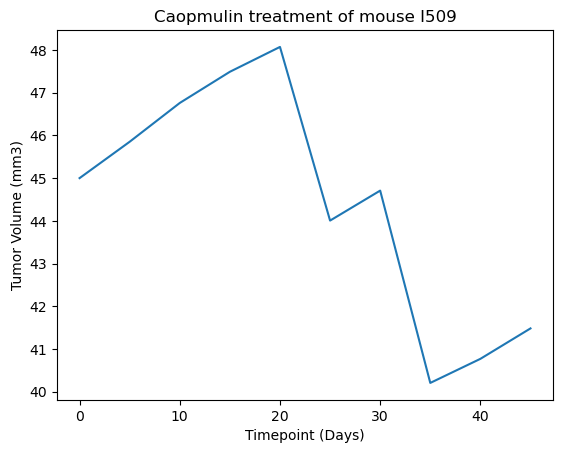

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_only_grouped = drug_data_short.loc[drug_data_short["Drug Regimen"] == "Capomulin"]


mouse_id = "l509"
single_mouse = cap_only_grouped.loc[cap_only_grouped["Mouse ID"]== mouse_id]
single_mouse_timept = single_mouse["Timepoint"].tolist()
single_mouse_tumor_volume = single_mouse["Tumor Volume (mm3)"].tolist()

plt.plot(single_mouse_timept, single_mouse_tumor_volume)
plt.title("Caopmulin treatment of mouse I509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

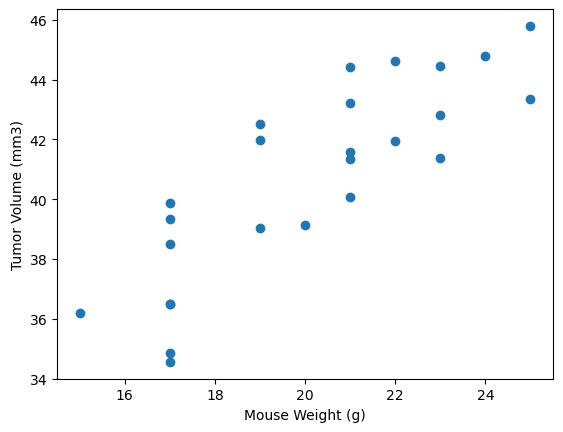

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#cap_only_grouped = capomulin_only.groupby(['Mouse ID'])
cap_only_avg = cap_only_grouped.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(cap_only_avg['Weight (g)'], cap_only_avg['Tumor Volume (mm3)'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


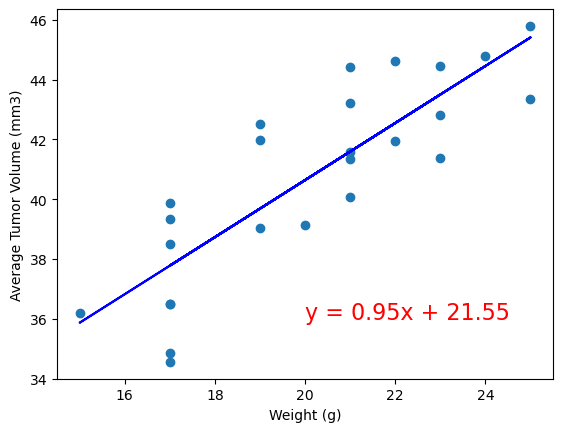

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_vol_corr = st.pearsonr(cap_only_avg['Weight (g)'],  cap_only_avg['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(weight_vol_corr[0],2)}")

slope, int, r, p, std_err = st.linregress(cap_only_avg['Weight (g)'],  cap_only_avg['Tumor Volume (mm3)'])
regressio_values = slope * (cap_only_avg['Weight (g)']) + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.scatter(cap_only_avg['Weight (g)'],  cap_only_avg['Tumor Volume (mm3)'])
plt.plot(cap_only_avg['Weight (g)'],regressio_values,"b-")
plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
